In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gravhydro as gh
from gravhydro import Tree, Simulation

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

# Test 1 : 2 Bodies

## Test 1a: Massive Central Body and Satellite

In [2]:
# For a circular orbit, the velocity should satisfy v = sqrt(G*M/r)
# where M is the central mass, r is the orbital radius, G = 1
G = 1.0
M_central = 1000.0
r = 1.0  # orbital radius

# Circular orbital velocity
v_circular = np.sqrt(G * M_central / r)

q = np.array([[0.0, 0.0, 0.0], [r, 0.0, 0.0]])
masses = np.array([M_central, 0.001])
p = np.array([[0.0, 0.0, 0.0], [0.0, v_circular*masses[1], 0.0]])  # velocity perpendicular to radius

In [3]:
test1a = Simulation()
dt = 0.001
t = 10
ts = np.linspace(0, t, int(t/dt)+1)

q_direct_1a, p_direct_1a = test1a.run(q, p, masses, ts, gravityMethod='directSummation')
q_tree_1a, p_tree_1a = test1a.run(q, p, masses, ts, gravityMethod='tree')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Text(0.5, 1.0, 'Particle Trajectories under Gravity')

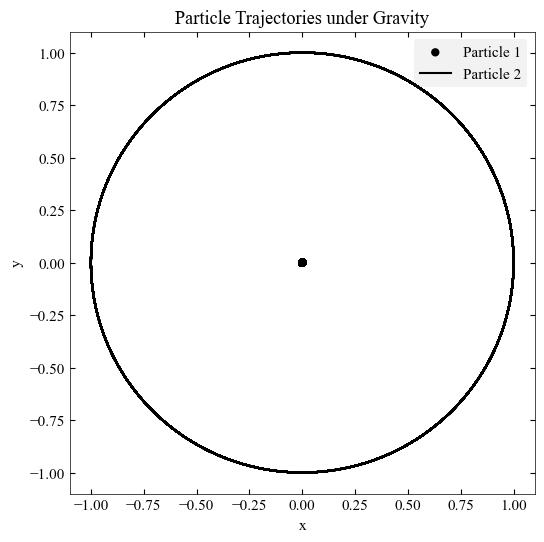

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(q_direct_1a[:, 0, 0], q_direct_1a[:, 0, 1], label='Particle 1')
plt.plot(q_direct_1a[:, 1, 0], q_direct_1a[:, 1, 1], label='Particle 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Particle Trajectories under Gravity')

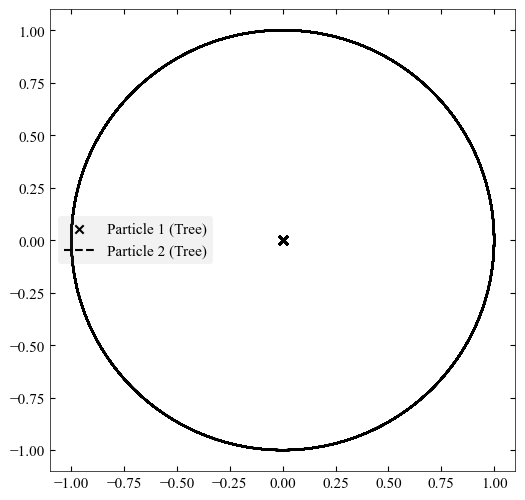

In [5]:
plt.figure(figsize=(6, 6))
plt.scatter(q_tree_1a[:, 0, 0], q_tree_1a[:, 0, 1], label='Particle 1 (Tree)', marker='x')
plt.plot(q_tree_1a[:, 1, 0], q_tree_1a[:, 1, 1], label='Particle 2 (Tree)', linestyle='--')
plt.legend()

## Binary Orbits

In [6]:
r = 1.0  # orbital radius
mass = 1
# Circular orbital velocity
v_circular = np.sqrt(G * mass / r)
q = np.array([[-r, 0.0, 0.0], [r, 0.0, 0.0]])
masses = np.array([mass,  mass])
p = np.array([[0.0, v_circular*masses[0]*0.2, 0.0], [0.0, -v_circular*masses[1]*0.4, 0.0]])  # velocity perpendicular to radius

In [9]:
test1b = Simulation()
dt = 0.1
t = 10
ts = np.linspace(0, t, int(t/dt)+1)
q_direct_1b, p_direct_1b = test1b.run(q, p, masses, ts, gravityMethod='directSummation')
q_tree_1b, p_tree_1b = test1b.run(q, p, masses, ts, gravityMethod='tree')

##

(-2.0, 0.5)

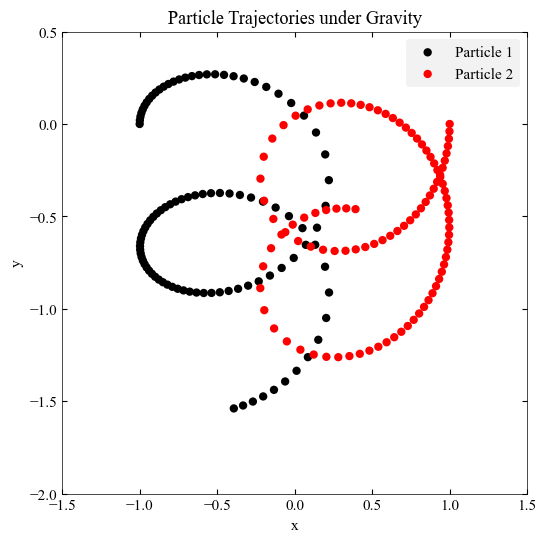

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(q_direct_1b[:, 0, 0], q_direct_1b[:, 0, 1], label='Particle 1', c='k')
plt.scatter(q_direct_1b[:, 1, 0], q_direct_1b[:, 1, 1], label='Particle 2', c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Particle Trajectories under Gravity')
plt.xlim(-1.5, 1.5)
plt.ylim(-2, 0.5)

(-2.0, 0.5)

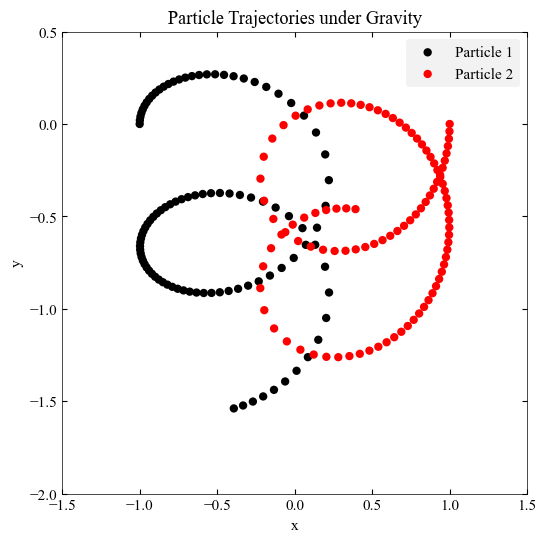

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(q_tree_1b[:, 0, 0], q_tree_1b[:, 0, 1], label='Particle 1', c='k')
plt.scatter(q_tree_1b[:, 1, 0], q_tree_1b[:, 1, 1], label='Particle 2', c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Particle Trajectories under Gravity')
plt.xlim(-1.5, 1.5)
plt.ylim(-2, 0.5)

# Many Bodies

Comparing direct summation vs tree method scaling...

Testing with 50 particles...
  Direct: 5.97ms, Tree: 8.97ms
Testing with 100 particles...
  Direct: 18.24ms, Tree: 32.44ms
Testing with 200 particles...
  Direct: 72.67ms, Tree: 98.76ms
Testing with 500 particles...
  Direct: 450.63ms, Tree: 340.24ms
Testing with 1000 particles...
  Direct: 1809.33ms, Tree: 924.63ms
Testing with 2000 particles...
  Direct: 7243.17ms, Tree: 2424.92ms


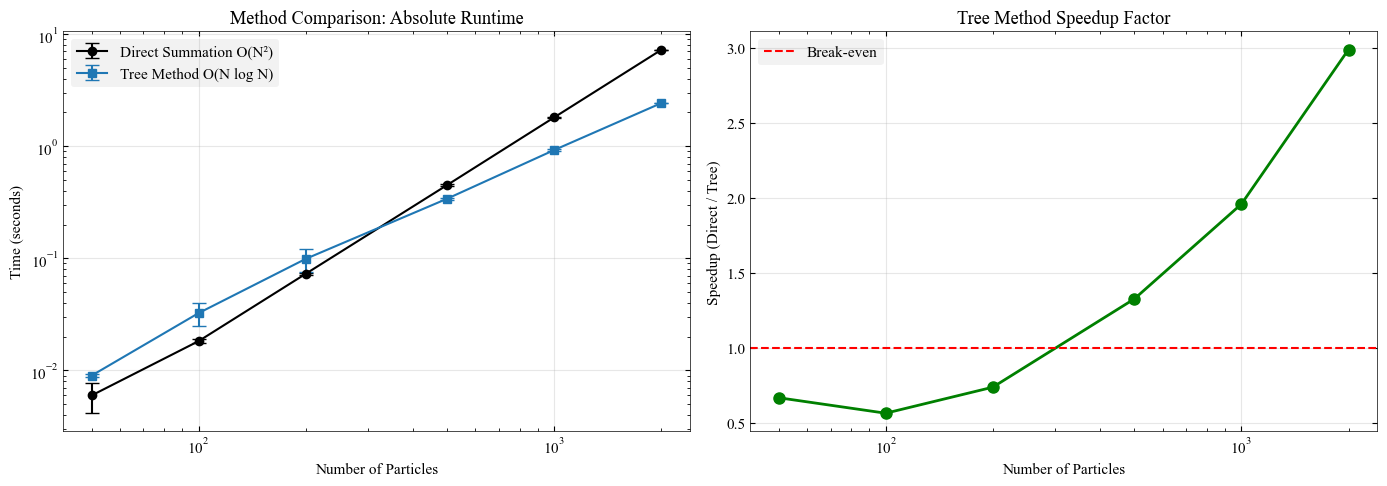


Scaling Summary:
N        Direct (ms)     Tree (ms)       Speedup   
------------------------------------------------------------
50       5.97            8.97            0.67      x
100      18.24           32.44           0.56      x
200      72.67           98.76           0.74      x
500      450.63          340.24          1.32      x
1000     1809.33         924.63          1.96      x
2000     7243.17         2424.92         2.99      x


In [ ]:
# import time

# # Scaling comparison between direct summation and tree methods

# def benchmark_methods(particle_counts, num_trials=3):
#     """
#     Benchmark direct summation vs tree method for different particle counts
#     Direct summation: O(N²)
#     Tree method: O(N log N)
#     """
#     results = {
#         'n_particles': [],
#         'direct_times': [],
#         'direct_times_std': [],
#         'tree_times': [],
#         'tree_times_std': []
#     }
    
#     for n in particle_counts:
#         print(f"Testing with {n} particles...")
        
#         direct_times = []
#         tree_times = []
        
#         for trial in range(num_trials):
#             np.random.seed(42 + trial)
#             test_q = np.random.normal(0, 0.5, size=(n, 3))
#             test_masses = np.random.uniform(1, 2, size=n)
#             test_p = np.zeros_like(test_q)
            
#             sim = Simulation()
#             ts_test = np.array([0.0, 0.01])  # Single timestep
            
#             # Time direct summation
#             start = time.time()
#             sim.run(test_q, test_p, test_masses, ts_test, gravityMethod='directSummation')
#             direct_times.append(time.time() - start)
            
#             # Time tree method
#             start = time.time()
#             sim.run(test_q, test_p, test_masses, ts_test, gravityMethod='tree', threshold=0.5)
#             tree_times.append(time.time() - start)
        
#         results['n_particles'].append(n)
#         results['direct_times'].append(np.mean(direct_times))
#         results['direct_times_std'].append(np.std(direct_times))
#         results['tree_times'].append(np.mean(tree_times))
#         results['tree_times_std'].append(np.std(tree_times))
        
#         print(f"  Direct: {np.mean(direct_times)*1000:.2f}ms, Tree: {np.mean(tree_times)*1000:.2f}ms")
    
#     return results

# # Test with different particle counts
# particle_counts = [50, 100, 200, 500, 1000, 2000]
# print("Comparing direct summation vs tree method scaling...\n")
# scaling_results = benchmark_methods(particle_counts)

# # Plot results
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# n = np.array(scaling_results['n_particles'])
# direct = np.array(scaling_results['direct_times'])
# tree = np.array(scaling_results['tree_times'])

# # Plot 1: Absolute times
# ax1.errorbar(n, direct, yerr=scaling_results['direct_times_std'], 
#              marker='o', label='Direct Summation O(N²)', capsize=5)
# ax1.errorbar(n, tree, yerr=scaling_results['tree_times_std'], 
#              marker='s', label='Tree Method O(N log N)', capsize=5)
# ax1.set_xlabel('Number of Particles')
# ax1.set_ylabel('Time (seconds)')
# ax1.set_title('Method Comparison: Absolute Runtime')
# ax1.set_xscale('log')
# ax1.set_yscale('log')
# ax1.legend()
# ax1.grid(True, alpha=0.3)

# # Plot 2: Speedup factor
# speedup = direct / tree
# ax2.plot(n, speedup, 'g-o', linewidth=2, markersize=8)
# ax2.axhline(y=1, color='r', linestyle='--', label='Break-even')
# ax2.set_xlabel('Number of Particles')
# ax2.set_ylabel('Speedup (Direct / Tree)')
# ax2.set_title('Tree Method Speedup Factor')
# ax2.set_xscale('log')
# ax2.legend()
# ax2.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Print summary
# print("\n" + "="*60)
# print("Scaling Summary:")
# print("="*60)
# print(f"{'N':<8} {'Direct (ms)':<15} {'Tree (ms)':<15} {'Speedup':<10}")
# print("-"*60)
# for i, n_val in enumerate(n):
#     print(f"{n_val:<8} {direct[i]*1000:<15.2f} {tree[i]*1000:<15.2f} {speedup[i]:<10.2f}x")

## Test 2a : Plummer Sphere

In [12]:
sim_2a = Simulation()

In [13]:
# q = np.random.normal(0, 0.5, size=(1000, 3))
# masses = np.random.uniform(1, 2, size=(q.shape[0]))
# sim_2a.tree.build(q, masses)
# forces = sim_2a.tree.force(threshold=1)

# p = np.zeros_like(q)
# # Calculate unit vectors tangential to force vectors
# force_magnitudes = np.linalg.norm(forces, axis=1)
# # Avoid division by zero for particles with zero force
# nonzero_force_mask = force_magnitudes > 1e-10

# # Create tangential velocities
# for i in range(len(q)):
#     if nonzero_force_mask[i]:
#         # Get force vector and normalize it
#         force_unit = forces[i] / force_magnitudes[i]
        
#         # Create a perpendicular vector in 3D
#         # Use cross product with a reference vector
#         if abs(force_unit[0]) < 0.9:
#             reference = np.array([1.0, 0.0, 0.0])
#         else:
#             reference = np.array([0.0, 1.0, 0.0])
        
#         # Get tangential direction
#         tangential = np.cross(force_unit, reference)
#         tangential = tangential / np.linalg.norm(tangential)
        
#         # Set velocity proportional to force magnitude
#         velocity_scale = 0.000  # Adjust this factor as needed
#         p[i] = tangential * force_magnitudes[i] * velocity_scale

In [20]:
from galpy.potential import PlummerPotential
from galpy.df import isotropicPlummerdf
from astropy import units as u
plummer = PlummerPotential(b=0.5)
df = isotropicPlummerdf(pot = plummer)
masses = np.ones(5000) / 1000
sample =  df.sample(n=5000)
q = np.zeros((5000, 3))
p = np.zeros((5000, 3))
q[:,0] = sample.x()
q[:,1] = sample.y()
q[:,2] = sample.z()
p[:,0] = sample.vx()
p[:,1] = sample.vy()
p[:,2] = sample.vz()

In [21]:
import time

# q = np.random.normal(0, 1, size=(100, 3))
# p = np.random.normal(0, 0, size=(100, 3))
# masses = np.ones(100) * 0.01

dt = 5e-3
t = 1
ts = np.linspace(0, t, int(t/dt)+1)

print("Running direct summation...")
start_direct = time.time()
q_direct_2a, p_direct_2a = sim_2a.run(q, p, masses, ts, threshold=0.5, gravityMethod='directSummation')
direct_time = time.time() - start_direct
print(f"Direct summation runtime: {direct_time:.4f}s")

# print("Running tree...")
# start_tree = time.time()
# q_tree_2a, p_tree_2a = sim_2a.run(q, p, masses, ts, threshold=0.5, gravityMethod='directTree')
# tree_time = time.time() - start_tree
# print(f"Tree runtime: {tree_time:.4f}s")

Running direct summation...
Direct summation runtime: 1.5007s


In [22]:
q_tree_2a

array([[[-3.60292817e-01, -1.01539275e-01,  5.55729249e-02],
        [ 1.91498122e-01,  6.04363540e-01,  8.07667837e-01],
        [ 1.75580388e-01, -2.99985151e-01,  3.52244828e-01],
        ...,
        [ 1.30954986e-02,  1.27657809e-01, -3.92344963e-01],
        [ 6.30916233e-01, -5.18268226e-01, -5.19176737e-01],
        [-5.41057637e-01,  9.10314896e-01, -4.02965981e-01]],

       [[ 7.92078255e-01,  2.68965803e-01, -2.13981680e+00],
        [-2.05252601e+00,  1.69013769e+00,  1.67010906e+00],
        [ 1.75907579e+00, -1.70390268e+00,  1.17748275e+00],
        ...,
        [ 2.01314582e+00,  9.27996433e-01, -2.08835175e-01],
        [-8.87074121e-01,  6.47615720e-01, -3.00365063e+00],
        [ 1.88424761e+00,  6.69420161e-01, -8.29788960e-01]],

       [[ 1.94444909e+00,  6.39470858e-01, -4.33520482e+00],
        [-4.29654936e+00,  2.77591075e+00,  2.53254920e+00],
        [ 3.34257029e+00, -3.10781910e+00,  2.00272022e+00],
        ...,
        [ 4.01319486e+00,  1.72833462e+00,

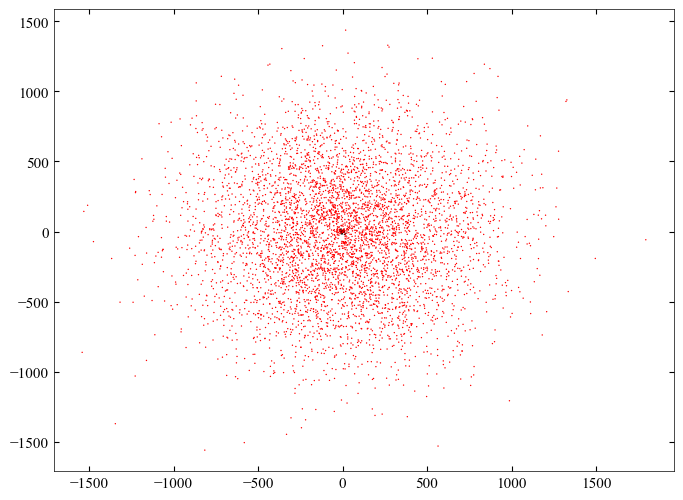

In [23]:
plt.scatter(q_direct_2a[0,:, 0], q_direct_2a[0, :, 1], c='k', s=1)
plt.scatter(q_direct_2a[-1,:, 0], q_direct_2a[-1, :, 1], c='r', s=1)

In [ ]:
plt.scatter(q_tree_2a[-1,:, 0], q_tree_2a[-1, :, 1])

In [27]:
import plotly.graph_objects as go

# Create animation frames for? particle evolution
frames = []

for i, t_val in enumerate(ts[::2]):  # Use every 2nd frame for smoother animation
    frame = go.Frame(
        data=[
            go.Scatter3d(
                x=q_direct_2a[i*2, :, 0],
                y=q_direct_2a[i*2, :, 1],
                z=q_direct_2a[i*2, :, 2],
                mode='markers',
                marker=dict(
                    size=5,
                    color=np.arange(len(q)),
                    colorscale='viridis',
                    opacity=0.8
                ),
                name='Particles'
            )
        ],
        name=str(i)
    )
    frames.append(frame)

# Create initial figure
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=q_direct_2a[0, :, 0],
            y=q_direct_2a[0, :, 1],
            z=q_direct_2a[0, :, 2],
            mode='markers',
            marker=dict(
                size=5,
                color=np.arange(len(q)),
                colorscale='viridis',
                opacity=0.8
            ),
            name='Particles'
        )
    ],
    frames=frames
)

# Add animation controls
fig.update_layout(
    title='3D Particle Evolution Animation (q_ev)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='cube',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
        xaxis=dict(range=[-2, 2]),
        yaxis=dict(range=[-2, 2]),
        zaxis=dict(range=[-2, 2])
    ),
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(
                    label='Play',
                    method='animate',
                    args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True)]
                ),
                dict(
                    label='Pause',
                    method='animate',
                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode='immediate')]
                )
            ]
        )
    ],
    sliders=[
        dict(
            steps=[
                dict(
                    args=[[f.name], dict(frame=dict(duration=0, redraw=True), mode='immediate')],
                    label=f't={ts[int(f.name)*2]:.2f}',
                    method='animate'
                ) for f in frames
            ],
            active=0,
            currentvalue=dict(prefix='Time: ')
        )
    ],
    width=800,
    height=800
)

fig.show()

NameError: name 'q_direct_2a' is not defined

In [ ]:

# Create animation frames for particle evolution
frames = []

for i, t_val in enumerate(ts[::2]):  # Use every 2nd frame for smoother animation
    frame = go.Frame(
        data=[
            go.Scatter3d(
                x=q_tree_2a[i*2, :, 0],
                y=q_tree_2a[i*2, :, 1],
                z=q_tree_2a[i*2, :, 2],
                mode='markers',
                marker=dict(
                    size=5,
                    color=np.arange(len(q)),
                    colorscale='viridis',
                    opacity=0.8
                ),
                name='Particles'
            )
        ],
        name=str(i)
    )
    frames.append(frame)

# Create initial figure
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=q_tree_2a[0, :, 0],
            y=q_tree_2a[0, :, 1],
            z=q_tree_2a[0, :, 2],
            mode='markers',
            marker=dict(
                size=5,
                color=np.arange(len(q)),
                colorscale='viridis',
                opacity=0.8
            ),
            name='Particles'
        )
    ],
    frames=frames
)

# Add animation controls
fig.update_layout(
    title='3D Particle Evolution Animation (q_ev)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='cube',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
        xaxis=dict(range=[-2, 2]),
        yaxis=dict(range=[-2, 2]),
        zaxis=dict(range=[-2, 2])
    ),
    updatemenus=[
        dict(
            type='buttons',
            showactive=False,
            buttons=[
                dict(
                    label='Play',
                    method='animate',
                    args=[None, dict(frame=dict(duration=100, redraw=True), fromcurrent=True)]
                ),
                dict(
                    label='Pause',
                    method='animate',
                    args=[[None], dict(frame=dict(duration=0, redraw=False), mode='immediate')]
                )
            ]
        )
    ],
    sliders=[
        dict(
            steps=[
                dict(
                    args=[[f.name], dict(frame=dict(duration=0, redraw=True), mode='immediate')],
                    label=f't={ts[int(f.name)*2]:.2f}',
                    method='animate'
                ) for f in frames
            ],
            active=0,
            currentvalue=dict(prefix='Time: ')
        )
    ],
    width=800,
    height=800
)

fig.show()

In [ ]:
q_ex = np.array([[-0.9, -0.8, 0.2]])

In [ ]:
forces = tree.force(q_ex, 0.5)

In [ ]:
np.sum(forces, axis=0)

array([277.86453364, 280.14818906, -39.32145575])

# Extra

# Performance Scaling Analysis

Let's analyze how the runtime scales with the number of particles to see if it follows expected complexity.

In [ ]:
import time
import matplotlib.pyplot as plt

def benchmark_tree_building(particle_counts, num_trials=3):
    """
    Benchmark tree building for different particle counts
    Expected complexity: O(N log N) for well-distributed particles
    Worst case: O(N^2) for badly distributed particles
    """
    results = {
        'n_particles': [],
        'build_times': [],
        'build_times_std': [],
        'sim_times': [],
        'sim_times_std': []
    }
    
    for n in particle_counts:
        print(f"Testing with {n} particles...")
        
        build_times = []
        sim_times = []
        
        for trial in range(num_trials):
            # Generate random data
            np.random.seed(42 + trial)  # Consistent but different seeds
            test_data = np.random.uniform(-1, 1, size=(n, 3))
            test_masses = np.ones(n)
            test_p = np.random.uniform(-0.01, 0.01, size=(n, 3))
            
            # Time tree building only
            tree = Tree()
            start_time = time.time()
            tree.build(test_data, test_masses)
            build_time = time.time() - start_time
            build_times.append(build_time)
            
            # Time full simulation (single timestep)
            sim = Simulation()
            ts_single = np.array([0.0, 0.01])  # Just two timesteps
            
            start_time = time.time()
            q_ev, p_ev = sim.run(test_data, test_p, test_masses, ts_single, threshold=0.5)
            sim_time = time.time() - start_time
            sim_times.append(sim_time)
        
        results['n_particles'].append(n)
        results['build_times'].append(np.mean(build_times))
        results['build_times_std'].append(np.std(build_times))
        results['sim_times'].append(np.mean(sim_times))
        results['sim_times_std'].append(np.std(sim_times))
        
        print(f"  Build time: {np.mean(build_times):.4f}s ± {np.std(build_times):.4f}s")
        print(f"  Sim time: {np.mean(sim_times):.4f}s ± {np.std(sim_times):.4f}s")
    
    return results

# Test with different particle counts
particle_counts = [10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
print("Starting scaling analysis...")
results = benchmark_tree_building(particle_counts)

Starting scaling analysis...
Testing with 10 particles...
  Build time: 0.0004s ± 0.0002s
  Sim time: 0.0016s ± 0.0002s
Testing with 20 particles...
  Build time: 0.0007s ± 0.0003s
  Sim time: 0.0043s ± 0.0008s
Testing with 50 particles...
  Build time: 0.0013s ± 0.0005s
  Sim time: 0.0107s ± 0.0001s
Testing with 100 particles...
  Build time: 0.0015s ± 0.0001s
  Sim time: 0.0308s ± 0.0006s
Testing with 200 particles...
  Build time: 0.0032s ± 0.0001s
  Sim time: 0.0908s ± 0.0018s
Testing with 500 particles...
  Build time: 0.0272s ± 0.0272s
  Sim time: 0.3537s ± 0.0055s
Testing with 1000 particles...
  Build time: 0.0169s ± 0.0009s
  Sim time: 0.9546s ± 0.0190s
Testing with 5000 particles...
  Build time: 0.1043s ± 0.0215s
  Sim time: 7.7380s ± 0.0265s
Testing with 10000 particles...
  Build time: 0.2616s ± 0.0223s
  Sim time: 18.7734s ± 0.1036s


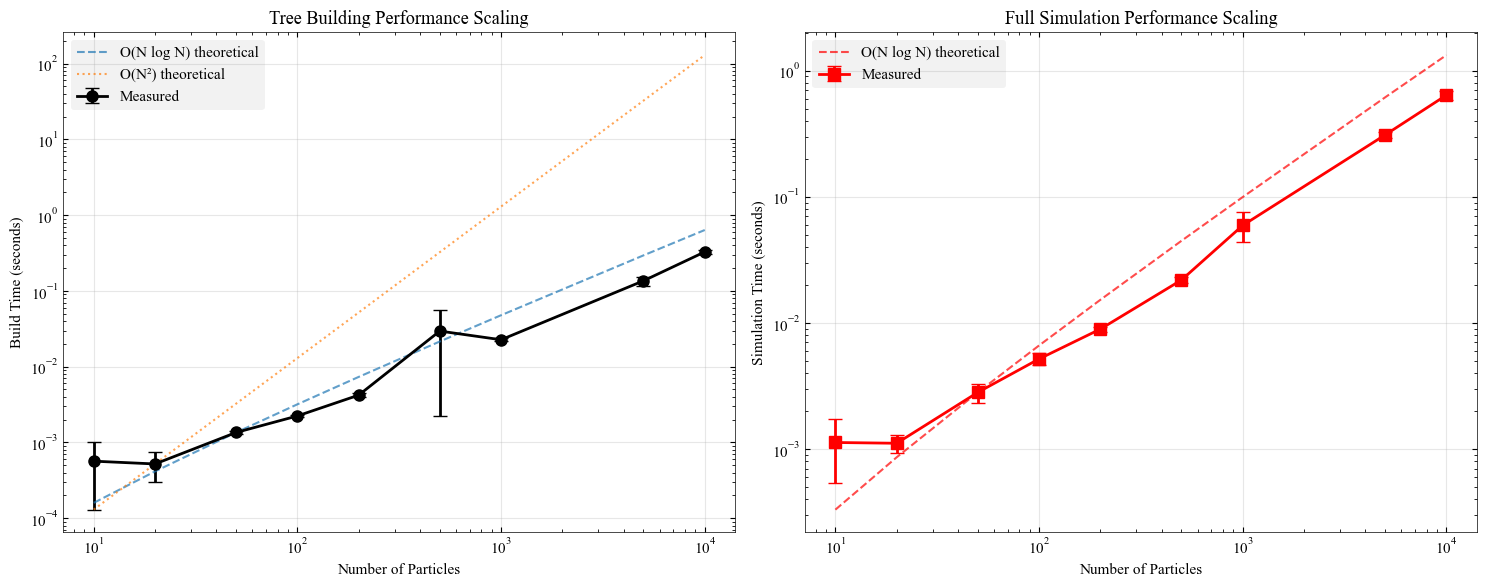

Performance Analysis:
N        Build (ms)   Sim (ms)     Build/Particle (μs) 
--------------------------------------------------
10       0.57         1.13         56.60               
20       0.52         1.11         26.00               
50       1.35         2.82         27.07               
100      2.24         5.19         22.38               
200      4.21         8.94         21.07               
500      29.53        21.88        59.05               
1000     22.68        59.30        22.68               
5000     136.04       308.89       27.21               
10000    327.64       638.52       32.76               

Scaling Analysis:
Build time ratio (500/100 particles): 146.39
Expected O(N log N) ratio: 6.75
Expected O(N²) ratio: 25.00


In [ ]:
# Plot the scaling analysis results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Convert to numpy arrays for easier manipulation
n_particles = np.array(results['n_particles'])
build_times = np.array(results['build_times'])
build_times_std = np.array(results['build_times_std'])
sim_times = np.array(results['sim_times'])
sim_times_std = np.array(results['sim_times_std'])

# Plot 1: Tree building times
ax1.errorbar(n_particles, build_times, yerr=build_times_std, 
             marker='o', linewidth=2, markersize=8, capsize=5, label='Measured')

# Add theoretical scaling lines for comparison
# O(N log N) scaling
scale_nlogn = build_times[2] / (n_particles[2] * np.log(n_particles[2]))
theoretical_nlogn = scale_nlogn * n_particles * np.log(n_particles)
ax1.plot(n_particles, theoretical_nlogn, '--', alpha=0.7, label='O(N log N) theoretical')

# O(N²) scaling for comparison
scale_n2 = build_times[1] / (n_particles[1]**2)
theoretical_n2 = scale_n2 * n_particles**2
ax1.plot(n_particles, theoretical_n2, ':', alpha=0.7, label='O(N²) theoretical')

ax1.set_xlabel('Number of Particles')
ax1.set_ylabel('Build Time (seconds)')
ax1.set_title('Tree Building Performance Scaling')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Full simulation times
ax2.errorbar(n_particles, sim_times, yerr=sim_times_std, 
             marker='s', linewidth=2, markersize=8, capsize=5, color='red', label='Measured')

# Add theoretical scaling for simulation (should be similar to tree building)
scale_sim_nlogn = sim_times[2] / (n_particles[2] * np.log(n_particles[2]))
theoretical_sim_nlogn = scale_sim_nlogn * n_particles * np.log(n_particles)
ax2.plot(n_particles, theoretical_sim_nlogn, '--', alpha=0.7, color='red', label='O(N log N) theoretical')

ax2.set_xlabel('Number of Particles')
ax2.set_ylabel('Simulation Time (seconds)')
ax2.set_title('Full Simulation Performance Scaling')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Print some analysis
print("Performance Analysis:")
print("=" * 50)
print(f"{'N':<8} {'Build (ms)':<12} {'Sim (ms)':<12} {'Build/Particle (μs)':<20}")
print("-" * 50)
for i, n in enumerate(n_particles):
    build_ms = build_times[i] * 1000
    sim_ms = sim_times[i] * 1000
    build_per_particle = build_times[i] / n * 1e6
    print(f"{n:<8} {build_ms:<12.2f} {sim_ms:<12.2f} {build_per_particle:<20.2f}")

# Check scaling behavior
print(f"\nScaling Analysis:")
print(f"Build time ratio (500/100 particles): {build_times[-1]/build_times[3]:.2f}")
print(f"Expected O(N log N) ratio: {(500/100) * (np.log(500)/np.log(100)):.2f}")
print(f"Expected O(N²) ratio: {(500/100)**2:.2f}")

## Full Tree

In [ ]:
# Create traces for particles
particle_trace = go.Scatter3d(
    x=data[:,0], 
    y=data[:,1], 
    z=data[:,2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Particles'
)

# Function to create cube edges for a node
def get_cube_edges(node):
    x = [node.xmin, node.xmax]
    y = [node.ymin, node.ymax]
    z = [node.zmin, node.zmax]
    
    edges_x, edges_y, edges_z = [], [], []
    
    # Create all 12 edges of the cube
    edges = [
        # Bottom face
        [(x[0],y[0],z[0]), (x[1],y[0],z[0])],
        [(x[1],y[0],z[0]), (x[1],y[1],z[0])],
        [(x[1],y[1],z[0]), (x[0],y[1],z[0])],
        [(x[0],y[1],z[0]), (x[0],y[0],z[0])],
        # Top face
        [(x[0],y[0],z[1]), (x[1],y[0],z[1])],
        [(x[1],y[0],z[1]), (x[1],y[1],z[1])],
        [(x[1],y[1],z[1]), (x[0],y[1],z[1])],
        [(x[0],y[1],z[1]), (x[0],y[0],z[1])],
        # Vertical edges
        [(x[0],y[0],z[0]), (x[0],y[0],z[1])],
        [(x[1],y[0],z[0]), (x[1],y[0],z[1])],
        [(x[1],y[1],z[0]), (x[1],y[1],z[1])],
        [(x[0],y[1],z[0]), (x[0],y[1],z[1])]
    ]
    
    for edge in edges:
        edges_x.extend([edge[0][0], edge[1][0], None])
        edges_y.extend([edge[0][1], edge[1][1], None])
        edges_z.extend([edge[0][2], edge[1][2], None])
    
    return edges_x, edges_y, edges_z

# Collect all cube edges
all_edges_x, all_edges_y, all_edges_z = [], [], []
nodes_to_check = [tree.root]
nodes_to_plot = []
while nodes_to_check:
    node = nodes_to_check.pop()
    nodes_to_check.extend(node.children)
    edges_x, edges_y, edges_z = get_cube_edges(node)
    all_edges_x.extend(edges_x)
    all_edges_y.extend(edges_y)
    all_edges_z.extend(edges_z)
    # for child in node.children:
    #     if len(child.particle_inds) == 1:
    #         nodes_to_plot.append(child)
            
# Create trace for tree structure
tree_trace = go.Scatter3d(
    x=all_edges_x,
    y=all_edges_y,
    z=all_edges_z,
    mode='lines',
    line=dict(color='red', width=2),
    name='Tree Structure'
)

# Create figure
fig = go.Figure(data=[particle_trace, tree_trace])
fig.update_layout(
    title='3D Tree Visualization',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=800,
    height=800
)
fig.show()